In [1]:
import numpy as np
import SimpleITK as sitk
import collections
import random
import PIL as img
from PIL import Image 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline 

In [4]:
#my_path =r'C:\Users\User\Desktop\Mask_generator\'           
my_path =r'C:\Users\User\Desktop\Atta-texana_CASENT0709539_head_tomo-A_recon.txm.nii'

In [3]:
ls C:\Users\User\Desktop\Mask_generator\

 Volume in drive C has no label.
 Volume Serial Number is 4815-4A1E

 Directory of C:\Users\User\Desktop\Mask_generator

01/11/2019  01:41 PM    <DIR>          .
01/11/2019  01:41 PM    <DIR>          ..
02/04/2019  11:32 AM    <DIR>          .ipynb_checkpoints
02/04/2019  11:27 AM    <DIR>          Mask_generator
01/11/2019  01:41 PM    <DIR>          Melissotarsus sp_CASENT0790604_W_head_1_out
01/05/2018  01:20 PM     1,981,671,472 Melissotarsus_W_head_segmentation.nii
03/05/2018  10:57 AM             2,036 Melissotarsus_W_head_segmentation_labels.txt
08/06/2018  10:11 AM     1,981,671,472 raw.nii
               3 File(s)  3,963,344,980 bytes
               5 Dir(s)  232,982,966,272 bytes free


In [5]:
#my_nii = sitk.ReadImage(r'C:\Users\User\Desktop\Mask_generator\Melissotarsus_W_head_segmentation.nii',sitk.sitkFloat32) #read nii file
#my_nii_np = sitk.GetArrayFromImage(my_nii)  # store data as array
my_nii = sitk.ReadImage(r'C:\Users\User\Desktop\Atta-texana_CASENT0709539_head_tomo-A_recon.txm.nii',sitk.sitkFloat32) #read nii file
my_nii_np = sitk.GetArrayFromImage(my_nii)  

In [6]:
print (my_nii_np.shape) # array dimensions

(995, 1013, 992)


In [6]:
#plt.imshow(my_nii_np[:,:,300]) #plot slice 300

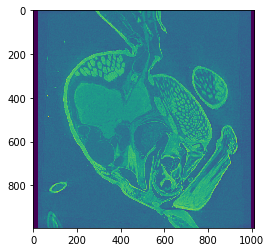

In [7]:
plt.imshow(my_nii_np[:,:,500])

In [8]:
collections.Counter(my_nii_np[:,:,500].flatten()) # check all categories (labels)

Counter({0.0: 40795,
         15259.0: 25,
         14815.0: 8,
         14886.0: 22,
         14508.0: 14,
         14555.0: 10,
         14272.0: 4,
         14449.0: 6,
         14765.0: 10,
         15204.0: 25,
         16462.0: 98,
         15258.0: 24,
         14846.0: 18,
         14417.0: 2,
         14873.0: 11,
         15104.0: 16,
         15414.0: 34,
         15669.0: 54,
         15276.0: 18,
         15197.0: 30,
         14772.0: 13,
         14299.0: 3,
         14146.0: 4,
         14265.0: 4,
         14105.0: 4,
         14203.0: 5,
         15070.0: 20,
         15149.0: 26,
         14903.0: 14,
         15299.0: 32,
         14883.0: 15,
         15206.0: 21,
         14803.0: 12,
         14907.0: 20,
         14644.0: 8,
         15164.0: 21,
         14847.0: 14,
         14632.0: 10,
         14552.0: 7,
         14311.0: 9,
         14392.0: 3,
         15086.0: 29,
         14791.0: 13,
         14221.0: 8,
         14435.0: 6,
         13929.0: 2,
     

In [9]:
slice_0 = my_nii_np[:,:,500] # slice 500 stored in a new variable
slice_0[slice_0!=10]=0 # change all pixels to 0 (except category 10)
slice_0[slice_0!=0]=1

In [10]:
slice_0

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

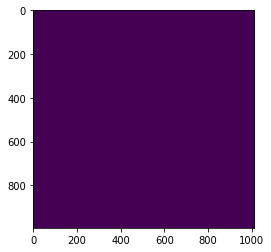

In [10]:
plt.imshow(slice_0) # plot
plt.show()

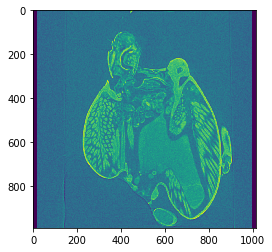

In [12]:
my_rawnii = sitk.ReadImage(r'C:\Users\User\Desktop\Mask_generator\raw.nii',sitk.sitkFloat32) #read raw nii file
my_rawnii_np = sitk.GetArrayFromImage(my_rawnii)  # store data as array

rawslice_0 = my_rawnii_np[:,:,500] # slice 500 stored in a new variable

plt.imshow(rawslice_0) # plot
plt.show()

In [27]:
yy = random.randint(0,990)   #(990, 1013, 988) #339   #create a random x and y numbers
xx = random.randint(0,1013) #190
print (xx,yy)


631 651


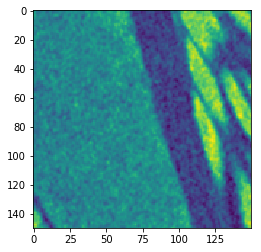

In [28]:
raw1 = rawslice_0[xx:xx+150,yy:yy+150]
plt.imshow(rawslice_0[xx:xx+150,yy:yy+150])  #extract same patch with segm and plot.
plt.show()

In [29]:
raw1

array([[-2161., -3196., -5587., ..., -1811., -3088., -6947.],
       [-2373., -3666., -6798., ...,   565., -1477., -4495.],
       [-3219., -3832., -6717., ...,  2196.,    31., -2398.],
       ...,
       [ 3390.,  5275.,  4193., ...,  2829.,  5353.,  5433.],
       [ 2086.,  3664.,  3349., ...,   844.,  3483.,  4289.],
       [  954.,  1539.,   992., ...,  -578.,  2352.,  3579.]],
      dtype=float32)

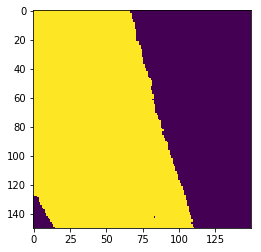

In [30]:
mask1 = slice_0[xx:xx+150,yy:yy+150]
plt.imshow(slice_0[xx:xx+150,yy:yy+150])  #extract a patch and plot.
plt.show()

In [31]:
mask1

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [33]:
rawimg1=Image.fromarray(raw1)
rawimg1.save('raw1.tif')

maskimg1 = Image.fromarray(mask1)
maskimg1.save('mask1.tif')
maskimg1.show()


In [34]:
rawimg2=sitk.GetImageFromArray(raw1)
sitk.WriteImage(rawimg2,'img1.tif')

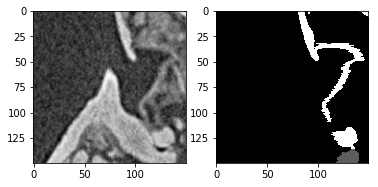

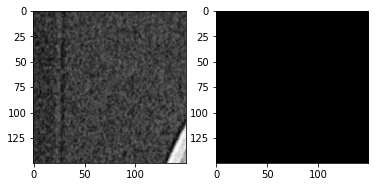

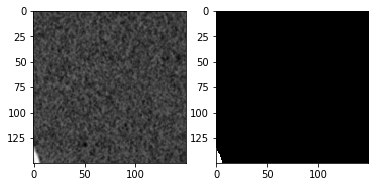

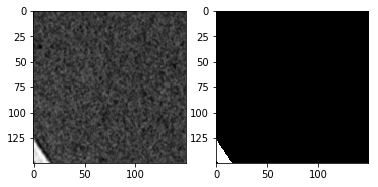

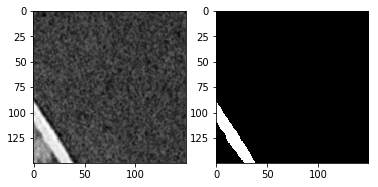

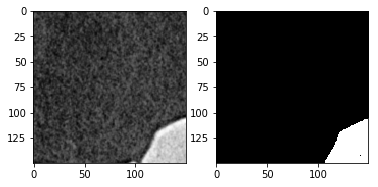

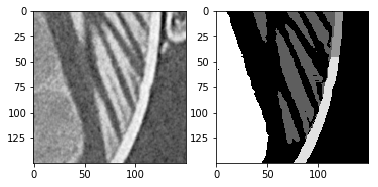

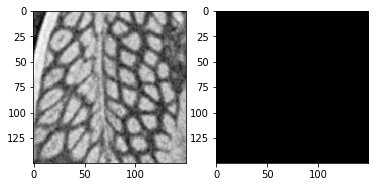

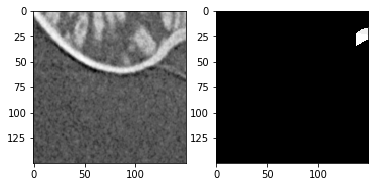

In [35]:
for i in range(499,500):
    slice_0 = my_nii_np[:,:,i]
    my_rawnii = sitk.ReadImage(r'C:\Users\User\Desktop\Mask_generator\raw.nii') 
    my_rawnii_np = sitk.GetArrayFromImage(my_rawnii)  
    rawslice_0 = my_rawnii_np[:,:,i]

    rawoutput = []
    maskoutput = []
    for x in range(0,9):
        yy = random.randint(0,800)   #(990, 1013, 988) #339   #create a random x and y numbers
        xx = random.randint(0,800) #190
      #  print (xx,yy)
        raw1 = rawslice_0[xx:xx+150,yy:yy+150]
        rawoutput.append(raw1)
        #plt.imshow(rawslice_0[xx:xx+150,yy:yy+150]) 
        #plt.show()
        mask1 = slice_0[xx:xx+150,yy:yy+150]
        maskoutput.append(mask1)
        #plt.imshow(slice_0[xx:xx+150,yy:yy+150])  #extract a patch and plot.
        #plt.show()
    
    for x in range(0,9):
        fig = plt.figure()
        ax = fig.add_subplot(121)
        ax.imshow(rawoutput[x], cmap = plt.cm.Greys_r)
        ax2 = fig.add_subplot(122)
        ax2.imshow(maskoutput[x], cmap = plt.cm.Greys_r)

    y = 0
    for x in range(0,9):
         rawimages = sitk.GetImageFromArray(rawoutput[x])
         rawimages = sitk.Cast(sitk.RescaleIntensity(rawimages),sitk.sitkUInt8)
         sitk.WriteImage( rawimages, 'image_'+str(i)+str(y)+'.tif')
         #rawimage = sitk.Cast(sitk.RescaleIntensity(rawimages),sitk.sitkUInt8)
         #sitk.WriteImage( rawimage, 'raw'+str(y)+'.jpg')
         maskimages = sitk.GetImageFromArray(maskoutput[x])  
         maskimages = sitk.Cast(sitk.RescaleIntensity(maskimages),sitk.sitkUInt8)
         sitk.WriteImage(maskimages, 'image_'+str(i)+str(y)+'_mask.tif')
         #maskimage = sitk.Cast(sitk.RescaleIntensity(maskimages),sitk.sitkUInt8)
         #sitk.WriteImage(maskimage, 'mask'+str(y)+'.jpg')
         y +=1
        
#plt.imshow(maskimages)

In [39]:

#maskimage1 = sitk.GetImageFromArray(maskoutput[0])

#sitk.WriteImage(maskimage1,'maskimage1.tif')

#sitk.Show(maskimage1)


In [40]:
#im = Image.fromarray(maskoutput[0])
#im.save("im.tif")
#Image.open("im.tif")
#pix = im.load()
#np.nonzero(pix[:,:]>0)
#for i in range (0,149):
#    print(pix[i,i])

#im.putpixel((1, 1), 1)

#for i in range (0,149):
   # print (pix[i,i])
    



In [41]:
#for x in range(0,9):
 #   fig = plt.figure()
  #  ax = fig.add_subplot(121)
   # ax.imshow(rawoutput[x])
    #ax2 = fig.add_subplot(122)
    #ax2.imshow(maskoutput[x])
    #fig.show()

In [42]:
#np.save("image_arr.npy",raw1)
    #np.save("mask_arr.npy",mask1)